<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

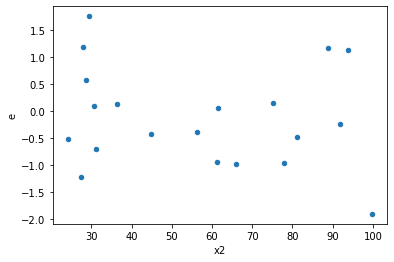

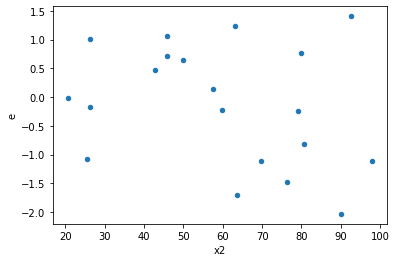

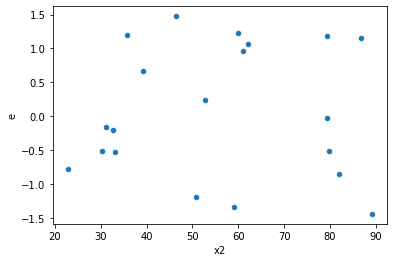

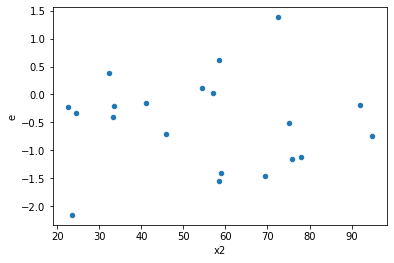

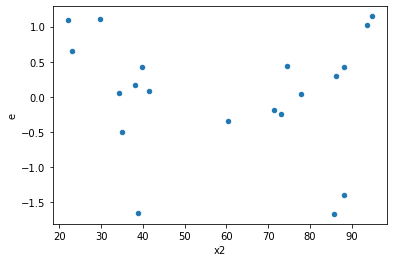

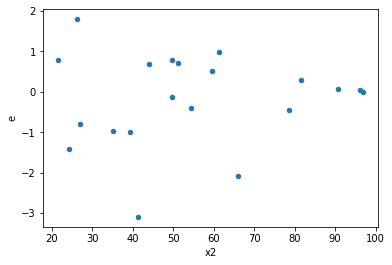

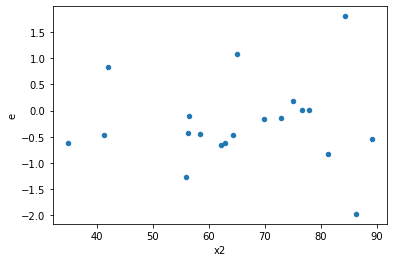

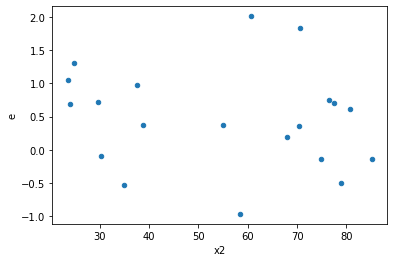

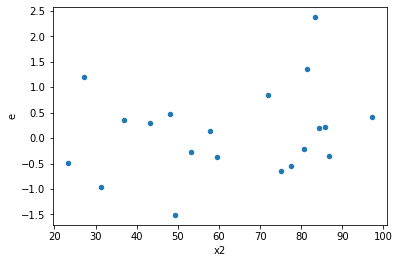

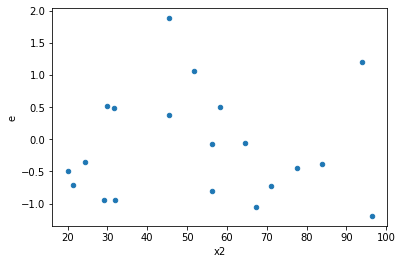

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,4.434825364162552,8.77450544652914,0.8869650728325104,1.754901089305828,1.9785458785897583,0.4718728155645535,0.7640635922177232,0.23593640778227676,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2.6748822962422474,3.582065141978666,0.5349764592484495,0.7164130283957333,1.339148697126171,0.7564395143781475,0.6217802428109263,0.37821975718907375,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.04259881649549164,6.7962859697654565,0.008519763299098327,1.3592571939530913,159.54166169111127,3.304873623366511e-05,0.9999834756318832,1.6524368116832555e-05,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.703822139486763,5.0707597916706435,0.1407644278973526,1.0141519583341287,7.204603986126826,0.04916770410650373,0.9754161479467481,0.024583852053251865,Reject005=0 : Heteroscedasticity
9.0,5.0,5.0,2.2296510220398127,2.70163890553447,0.44593020440796255,0.5403277811068941,1.2116868867948922,0.8382560399594101,0.5808719800202949,0.41912801997970506,Reject005=1 : Homoscedasticity
10.0,5.0,5.0,1.2785665847169427,3.5651273150493954,0.25571331694338856,0.7130254630098791,2.788378296182882,0.2848169161770979,0.857591541911451,0.14240845808854896,Reject005=1 : Homoscedasticity
11.0,5.0,5.0,1.6597541223274874,5.3067165086487265,0.3319508244654975,1.0613433017297453,3.197290753649144,0.22787045082543567,0.8860647745872822,0.11393522541271783,Reject005=1 : Homoscedasticity
12.0,5.0,5.0,1.9073854945029551,3.0181249441125435,0.381477098900591,0.6036249888225087,1.5823361102465738,0.6268261338678829,0.6865869330660586,0.31341306693394144,Reject005=1 : Homoscedasticity
14.0,5.0,5.0,3.4578882225864946,5.320131661433619,0.691577644517299,1.0640263322867238,1.5385493454308854,0.6478952982825672,0.6760523508587164,0.3239476491412836,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,4.343952872981696,1.829317061949845,0.8687905745963391,0.365863412389969,0.421118072741475,0.3643879010417242,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,4.434825364162552,8.77450544652914,0.8869650728325104,1.754901089305828,1.9785458785897583,0.4718728155645535,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,2.6748822962422474,3.582065141978666,0.5349764592484495,0.7164130283957333,1.339148697126171,0.7564395143781475,Reject005=1 : Homoscedasticity
3.0,5.0,5.0,0.04259881649549164,6.7962859697654565,0.008519763299098327,1.3592571939530913,159.54166169111127,3.304873623366511e-05,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.703822139486763,5.0707597916706435,0.1407644278973526,1.0141519583341287,7.204603986126826,0.04916770410650373,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,10.209533599168063,1.5201586312489401,2.0419067198336127,0.304031726249788,0.1488959918181583,0.0568072471426532,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,2.0796174110708296,0.32888246146081834,0.4159234822141659,0.06577649229216367,0.15814565684534798,0.0642062232574481,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,1.6500305544326646,0.08160009844158186,0.3300061108865329,0.016320019688316374,0.04945368934070357,0.004975425203238693,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,2.332834045019693,0.6666590794178605,0.4665668090039386,0.1333318158835721,0.2857721837698201,0.1954628554836969,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      919
Reject005=0 : Heteroscedasticity     81
Name: Result_test, dtype: int64